In [164]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [165]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline


Populating the interactive namespace from numpy and matplotlib


### Data Schema Analysis

In [166]:
multiple_choice_responses_df = pd.read_csv("../kaggle-survey-2017/multipleChoiceResponses.csv", low_memory=False)

multiple_choice_responses_df.head()

multiple_choice_responses_df.shape

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,nan,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.000,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.000,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.000,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.000,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(16716, 228)

##  Column Schema on Multiple Choice Responses

In [167]:
schema_df = pd.read_csv("../kaggle-survey-2017/schema.csv")
schema_df = schema_df.set_index('Column')
with pd.option_context('display.max_rows', 300):
    schema_df



,Question,Asked
Column,,
GenderSelect,Select your gender identity. - Selected Choice,All
GenderFreeForm,Select your gender identity. - A different ide...,All
Country,Select the country you currently live in.,All
Age,What's your age?,All
EmploymentStatus,What's your current employment status?,All
StudentStatus,Are you currently enrolled as a student at a d...,Non-worker
LearningDataScience,Are you currently focused on learning data sci...,Non-worker
KaggleMotivationFreeForm,What's your motivation for being a Kaggle user?,Non-switcher
CodeWriter,Do you write code to analyze data in your curr...,Worker1


## Nice Columns Multiple Choice Responses Full View 

In [168]:
nice_columns_multiple_choice_responses_df = multiple_choice_responses_df.copy()
nice_columns_multiple_choice_responses_df.columns = nice_columns_multiple_choice_responses_df.columns.map(
    schema_df.set_index('Column')['Question'].get)

with pd.option_context('display.max_columns', 0):
    nice_columns_multiple_choice_responses_df.head(5)


KeyError: 'Column'

In [169]:
freeform_col_names = schema_df[schema_df['Column'].str.contains("FreeForm")].shape[0]
total_col_names = schema_df.shape[0]

print('Number of free form columns: ', freeform_col_names)
print('Total Number of columns: ', total_col_names)




KeyError: 'Column'

### Unique Values per Column

In [170]:
with pd.option_context('display.max_rows', 228):
    multiple_choice_responses_df.nunique().sort_values(ascending=False)

WorkMethodsSelect                              6190
LearningPlatformSelect                         5362
WorkToolsSelect                                5248
WorkChallengesSelect                           4287
WorkDatasetsChallenge                          2237
PastJobTitlesSelect                            1855
MLTechniquesSelect                             1801
WorkDatasets                                   1733
WorkAlgorithmsSelect                           1420
MLSkillsSelect                                 1037
BlogsPodcastsNewslettersSelect                 1012
CompensationAmount                              906
WorkDataSourcing                                271
WorkHardwareSelect                              222
WorkDataStorage                                 159
PublicDatasetsSelect                            114
HardwarePersonalProjectsSelect                   95
CurrentEmployerType                              91
CompensationCurrency                             87
Age         

### Top Unique Non-Missing Data

In [171]:
unique_answers = multiple_choice_responses_df.nunique().sort_values(ascending=False)
unique_answers_df = pd.DataFrame({'Column': unique_answers.index, 'UniqueCount': unique_answers.values})
unique_answers_df = unique_answers_df.set_index('Column')

total = multiple_choice_responses_df.isnull().sum().sort_values(ascending=False)
percent = multiple_choice_responses_df.isnull().sum()/multiple_choice_responses_df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1, keys=['Total','Percent'],sort=True)
missing_data = missing_data.Percent.sort_values()

missing_data_df = pd.DataFrame({'Column': missing_data.index, 'MissingPercent': missing_data.values})
missing_data_df = missing_data_df.set_index('Column')



In [172]:
all_missing_unique_data_df = pd.concat([unique_answers_df, missing_data_df], axis=1, sort=True)
all_missing_unique_data_df = all_missing_unique_data_df.sort_values('MissingPercent')
top_mssing_unique_df = all_missing_unique_data_df.head(20)
top_mssing_unique_df.sort_values('UniqueCount')

,UniqueCount,MissingPercent
CodeWriter,2,0.211
DataScienceIdentitySelect,3,0.242
GenderSelect,4,0.006
Tenure,6,0.190
FirstTrainingSelect,6,0.120
EmploymentStatus,7,0.000
FormalEducation,7,0.102
ParentsEducation,10,0.242
MajorSelect,15,0.205
LearningCategoryOther,42,0.217


In [173]:
multiple_choice_responses_df['WorkMethodsSelect'].head(10)

0    Association Rules,Collaborative Filtering,Neur...
1                                                  NaN
2                                                  NaN
3    A/B Testing,Bayesian Techniques,Data Visualiza...
4    Association Rules,Bayesian Techniques,CNNs,Col...
5    Association Rules,Bayesian Techniques,CNNs,Cro...
6    A/B Testing,Cross-Validation,Data Visualizatio...
7                                                  NaN
8                                   Data Visualization
9    A/B Testing,Association Rules,CNNs,Cross-Valid...
Name: WorkMethodsSelect, dtype: object

In [174]:
multiple_choice_responses_df['LearningPlatformSelect'].head(10)

0    College/University,Conferences,Podcasts,Trade ...
1                                               Kaggle
2    Arxiv,College/University,Kaggle,Online courses...
3    Blogs,College/University,Conferences,Friends n...
4                    Arxiv,Conferences,Kaggle,Textbook
5    Kaggle,Online courses,Stack Overflow Q&A,Textbook
6        Arxiv,Blogs,Kaggle,Personal Projects,Textbook
7    College/University,Kaggle,Online courses,Stack...
8    Blogs,Company internal community,Conferences,F...
9    Arxiv,Blogs,Conferences,Kaggle,Non-Kaggle onli...
Name: LearningPlatformSelect, dtype: object

In [175]:
multiple_choice_responses_df['Tenure'].head(10)

0    More than 10 years
1      Less than a year
2          3 to 5 years
3    More than 10 years
4    More than 10 years
5         6 to 10 years
6    More than 10 years
7          1 to 2 years
8          3 to 5 years
9          1 to 2 years
Name: Tenure, dtype: object

In [176]:
multiple_choice_responses_df['FirstTrainingSelect'].head(10)

0                             University courses
1                             University courses
2                             University courses
3                             University courses
4                             University courses
5    Online courses (coursera, udemy, edx, etc.)
6                             University courses
7                             University courses
8                                           Work
9                                    Self-taught
Name: FirstTrainingSelect, dtype: object

### Data Analysis

#### How long have you been writing code to analyze data? (Asked to all participants)

<Figure size 648x648 with 0 Axes>

([<matplotlib.patches.Wedge at 0x11fc6ab00>,
 [Text(0.770379,0.785186,'1 to 2 years'),
  Text(-0.787507,0.768005,'3 to 5 years'),
  Text(-0.932811,-0.582979,'Less than a year'),
  Text(0.0122578,-1.09993,'More than 10 years'),
  Text(0.847734,-0.700962,'6 to 10 years'),
  Text(1.08822,-0.160567,"I don't write code to analyze data")],
 [Text(0.420207,0.428283,'25%'),
  Text(-0.429549,0.418912,'25%'),
  Text(-0.508806,-0.317988,'18%'),
  Text(0.00668608,-0.599963,'15%'),
  Text(0.4624,-0.382343,'13%'),
  Text(0.593573,-0.0875818,'5%')])

Text(0.5,1,'How long have you been writing code to analyze data?')

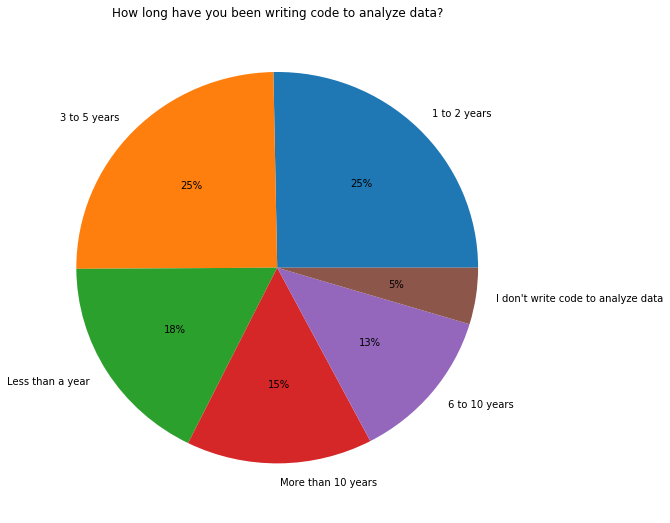

In [177]:
plt.figure(figsize=(9,9))
tenure_time = multiple_choice_responses_df['Tenure'].value_counts()
plt.pie(tenure_time,labels= tenure_time.index,autopct='%.0f%%')
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
plt.title('How long have you been writing code to analyze data?')


#### Tenure vs LanguageRecommendationSelect
[Findings] What languages are more recommended based on Job Tenure?

In [178]:
tenure_language = pd.crosstab(multiple_choice_responses_df['LanguageRecommendationSelect'],multiple_choice_responses_df['Tenure'],margins=True)
tenure_language = tenure_language.sort_values('All', ascending=False)
tenure_language

Tenure,1 to 2 years,3 to 5 years,6 to 10 years,I don't write code to analyze data,Less than a year,More than 10 years,All
LanguageRecommendationSelect,,,,,,,
All,2462,2419,1246,449,1811,1556,9943
Python,1620,1529,790,223,1198,853,6213
R,572,619,324,126,392,420,2453
SQL,75,97,39,23,62,79,375
C/C++/C#,58,52,20,34,52,48,264
Matlab,52,35,24,8,45,45,209
Java,26,19,7,19,24,22,117
Scala,18,23,16,0,13,20,90
SAS,14,14,9,7,13,24,81


Tenure,1 to 2 years,3 to 5 years,6 to 10 years,I don't write code to analyze data,Less than a year,More than 10 years
LanguageRecommendationSelect,,,,,,
Python,1620,1529,790,223,1198,853
R,572,619,324,126,392,420
SQL,75,97,39,23,62,79


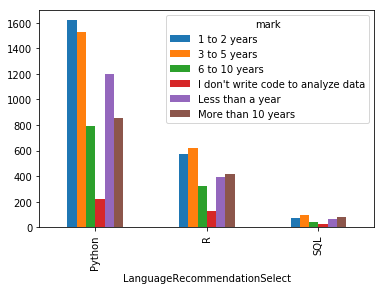

In [179]:
tenure_language.iloc[1:4, :-1]
tenure_language.iloc[1:4, :-1].plot.bar()
plt.legend(title='mark')

plt.show()

### Salary Compensation (Global)

[Text(0,0,'$1.00  to  $10,000.00.'),
 Text(0,0,'$10,000.00  to  $25,000.00.'),
 Text(0,0,'$25,000.00  to  $50,000.00.'),
 Text(0,0,'$50,000.00  to  $75,000.00.'),
 Text(0,0,'$75,000.00  to  $100,000.00.'),
 Text(0,0,'$100,000.00  to  $150,000.00.'),
 Text(0,0,'$150,000.00  to  $200,000.00.'),
 Text(0,0,'$200,000.00  to  $300,000.00.')]

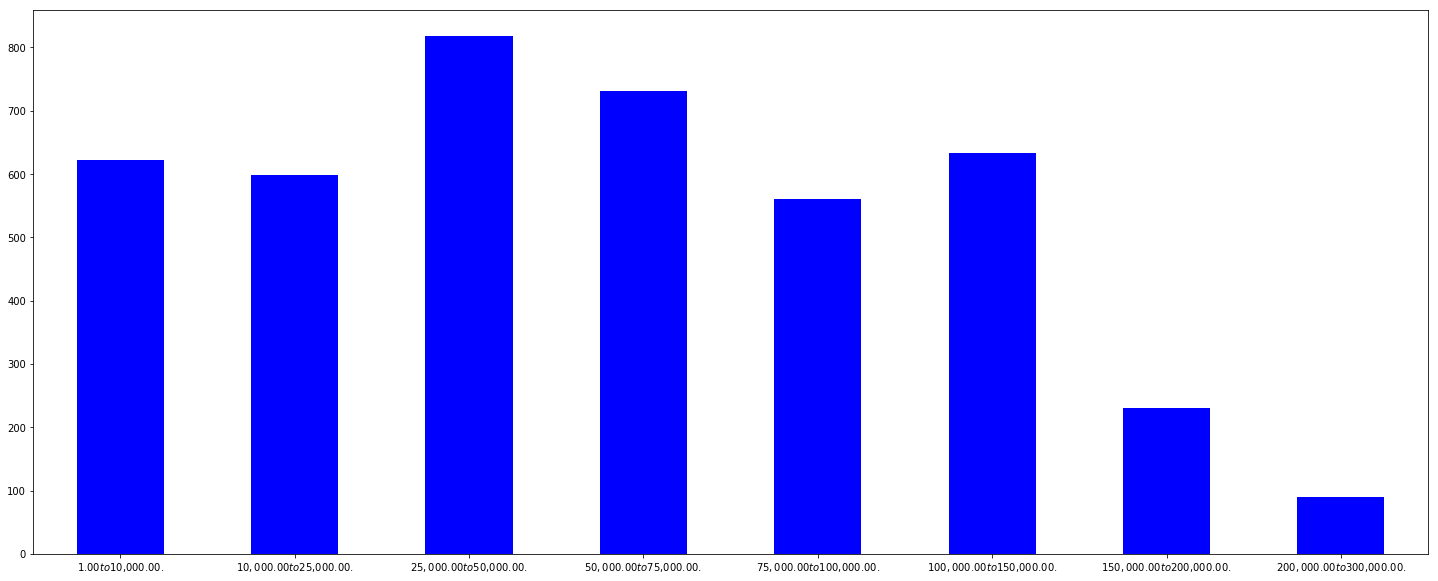

In [180]:
 pd.set_option('display.float_format', lambda x: '%.3f' % x)

conversion_rates_df = pd.read_csv("../kaggle-survey-2017/conversionRates.csv", usecols=["originCountry", "exchangeRate"] )
conversion_rates_df.columns = ['CompensationCurrency','ExchangeRate']

salaries = multiple_choice_responses_df.copy()

salaries['CompensationAmount'].fillna('0', inplace=True)
    
salaries['CompensationAmount'] = salaries['CompensationAmount'].iloc[:].str.replace(',','')
salaries['CompensationAmount'] = salaries['CompensationAmount'].iloc[:].str.replace('-','')
salaries['CompensationAmount'] = pd.to_numeric(salaries['CompensationAmount'])

salaries = pd.merge(salaries, conversion_rates_df, on=['CompensationCurrency'])

salaries['SalaryUSD'] = salaries['CompensationAmount'] * salaries['ExchangeRate']

bins = [1, 10000, 25000, 50000, 75000 , 100000, 150000, 200000, 300000]
salary_groups = pd.cut(salaries['SalaryUSD'], bins, include_lowest=False).dropna()


ax = salary_groups.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(25,10))

ax.set_xticklabels(['{left}  to  {right}.'.format(left= '${:,.2f}'.format(c.left), right='${:,.2f}'.format(c.right))  for c in salary_groups.cat.categories])
plt.show()





### Salary Compensation (USA)

[Text(0,0,'$1.00  to  $10,000.00.'),
 Text(0,0,'$10,000.00  to  $25,000.00.'),
 Text(0,0,'$25,000.00  to  $50,000.00.'),
 Text(0,0,'$50,000.00  to  $75,000.00.'),
 Text(0,0,'$75,000.00  to  $100,000.00.'),
 Text(0,0,'$100,000.00  to  $150,000.00.'),
 Text(0,0,'$150,000.00  to  $200,000.00.'),
 Text(0,0,'$200,000.00  to  $300,000.00.')]

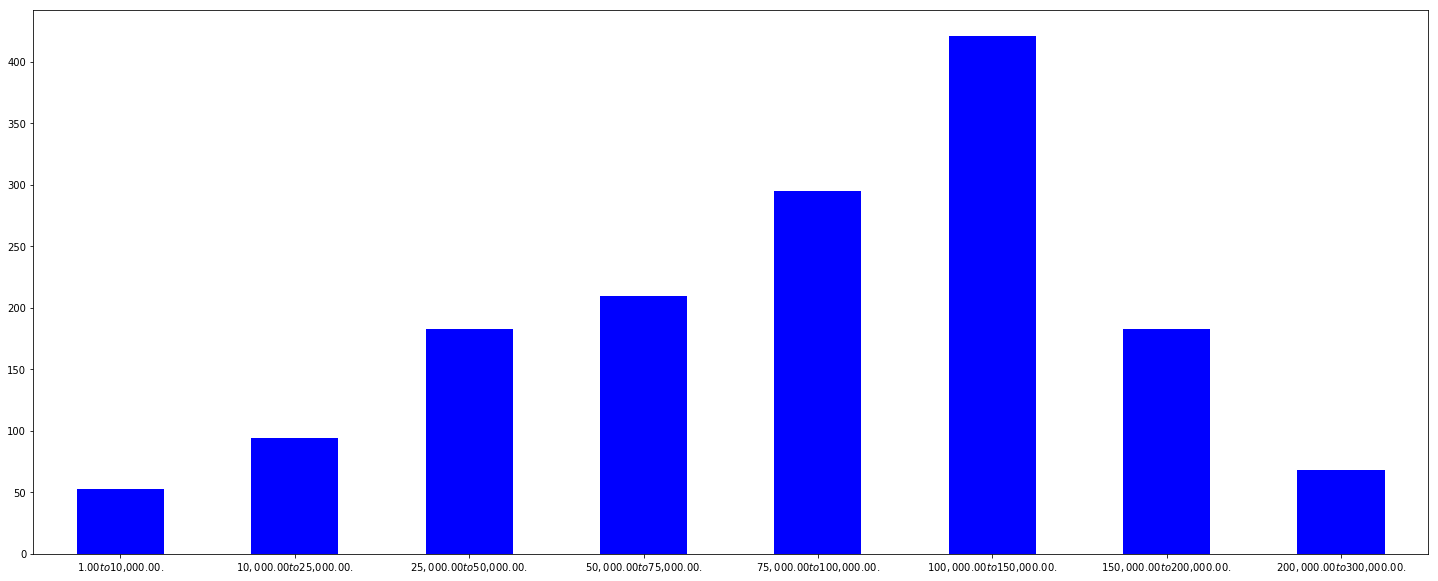

In [181]:
usd_salaries = salaries.copy()
usd_salaries = usd_salaries.loc[usd_salaries['CompensationCurrency'] == 'USD']

bins = [1, 10000, 25000, 50000, 75000 , 100000, 150000, 200000, 300000]
salary_groups = pd.cut(usd_salaries['SalaryUSD'], bins, include_lowest=False).dropna()


ax = salary_groups.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(25,10))

ax.set_xticklabels(['{left}  to  {right}.'.format(left= '${:,.2f}'.format(c.left), right='${:,.2f}'.format(c.right))  for c in salary_groups.cat.categories])
plt.show()


### Salary Compensation (Canada) in usd

[Text(0,0,'$1.00  to  $10,000.00.'),
 Text(0,0,'$10,000.00  to  $25,000.00.'),
 Text(0,0,'$25,000.00  to  $50,000.00.'),
 Text(0,0,'$50,000.00  to  $75,000.00.'),
 Text(0,0,'$75,000.00  to  $100,000.00.'),
 Text(0,0,'$100,000.00  to  $150,000.00.'),
 Text(0,0,'$150,000.00  to  $200,000.00.'),
 Text(0,0,'$200,000.00  to  $300,000.00.')]

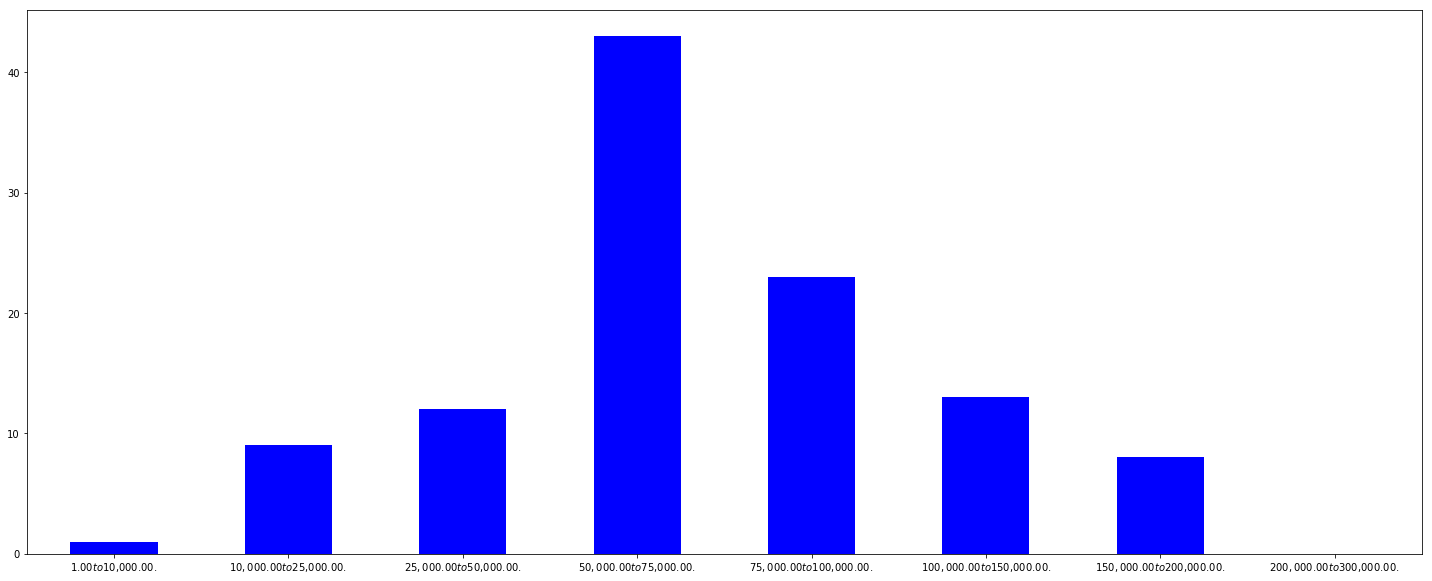

In [182]:
cad_salaries = salaries.copy()
cad_salaries = cad_salaries.loc[cad_salaries['CompensationCurrency'] == 'CAD']

bins = [1, 10000, 25000, 50000, 75000 , 100000, 150000, 200000, 300000]
salary_groups = pd.cut(cad_salaries['SalaryUSD'], bins, include_lowest=False).dropna()


ax = salary_groups.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(25,10))

ax.set_xticklabels(['{left}  to  {right}.'.format(left= '${:,.2f}'.format(c.left), right='${:,.2f}'.format(c.right))  for c in salary_groups.cat.categories])
plt.show()

### Salary Compensation (Canada) in CAD

[Text(0,0,'$1.00  to  $10,000.00.'),
 Text(0,0,'$10,000.00  to  $25,000.00.'),
 Text(0,0,'$25,000.00  to  $50,000.00.'),
 Text(0,0,'$50,000.00  to  $75,000.00.'),
 Text(0,0,'$75,000.00  to  $100,000.00.'),
 Text(0,0,'$100,000.00  to  $150,000.00.'),
 Text(0,0,'$150,000.00  to  $200,000.00.'),
 Text(0,0,'$200,000.00  to  $300,000.00.')]

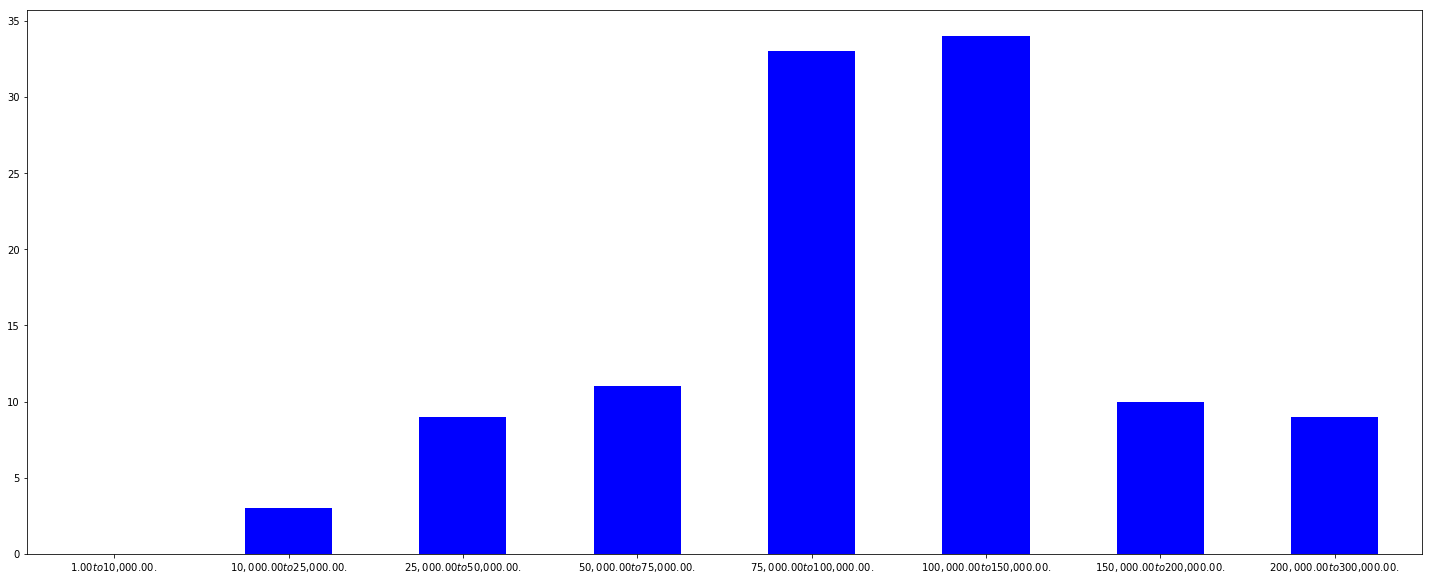

In [183]:
cad_salaries = salaries.copy()
cad_salaries = cad_salaries.loc[cad_salaries['CompensationCurrency'] == 'CAD']
cad_salaries['SalaryCAD'] = cad_salaries['CompensationAmount'] * (1 + (1 - 0.823688))

bins = [1, 10000, 25000, 50000, 75000 , 100000, 150000, 200000, 300000]
salary_groups = pd.cut(cad_salaries['SalaryCAD'], bins, include_lowest=False).dropna()


ax = salary_groups.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(25,10))

ax.set_xticklabels(['{left}  to  {right}.'.format(left= '${:,.2f}'.format(c.left), right='${:,.2f}'.format(c.right))  for c in salary_groups.cat.categories])
plt.show()

### Salary Compensation (India) in usd

[Text(0,0,'$1.00  to  $10,000.00.'),
 Text(0,0,'$10,000.00  to  $25,000.00.'),
 Text(0,0,'$25,000.00  to  $50,000.00.'),
 Text(0,0,'$50,000.00  to  $75,000.00.'),
 Text(0,0,'$75,000.00  to  $100,000.00.'),
 Text(0,0,'$100,000.00  to  $150,000.00.'),
 Text(0,0,'$150,000.00  to  $200,000.00.'),
 Text(0,0,'$200,000.00  to  $300,000.00.')]

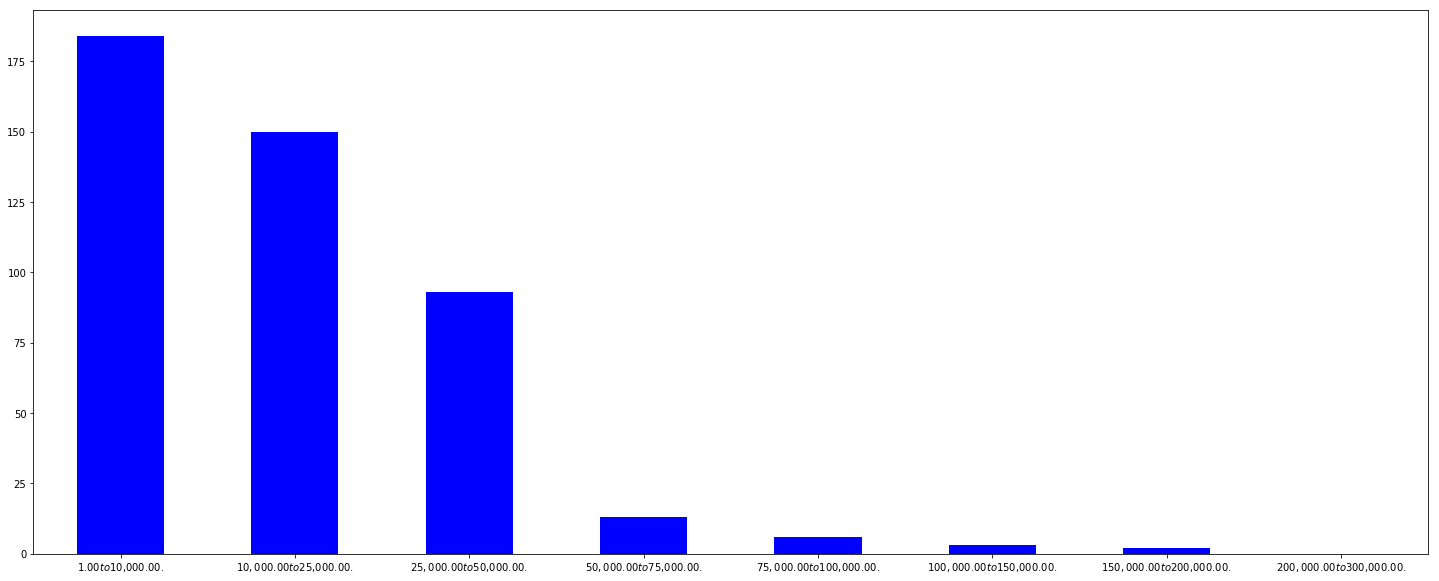

In [184]:
inr_salaries = salaries.copy()
inr_salaries = inr_salaries.loc[inr_salaries['CompensationCurrency'] == 'INR']

bins = [1, 10000, 25000, 50000, 75000 , 100000, 150000, 200000, 300000]
salary_groups = pd.cut(inr_salaries['SalaryUSD'], bins, include_lowest=False).dropna()


ax = salary_groups.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(25,10))

ax.set_xticklabels(['{left}  to  {right}.'.format(left= '${:,.2f}'.format(c.left), right='${:,.2f}'.format(c.right))  for c in salary_groups.cat.categories])
plt.show()

### TODO
#### FirstTrainingSelect

Correlation

2 - Salary vs Language (Compensation Amount )

3 - Time spent modelling 
TimeFindingInsights

4- JobFactor Salary
Tenure vs language | employment

5 - Learning Data Science
LanguageRecommendationSelect
PublicDatasetsSelect

6 - JobSkillImportancePython
JobSkillImportanceEnterpriseTools


CareerSwitcher -> Gender
CareerSwitcher -> Learning
CareerSwitcher -> 

Language usage at work vs learning
CodeWriter vs something